In [1]:
import sojourn

In [2]:
M = sojourn.MM1PS(10, 8, infty=20)

In [3]:
M.W(0)

0.9884707849539316

In [4]:
M.W(1)

0.1008918202483799

In [5]:
M.W(2)

0.00017631843043151025

In [6]:
import ciw

In [7]:
N = ciw.create_network(
    arrival_distributions=[ciw.dists.Exponential(8)],
    service_distributions=[ciw.dists.Exponential(10)],
    number_of_servers=[float('inf')]
)

In [31]:
ciw.seed(0)
Q = ciw.Simulation(N, node_class=ciw.PSNode)
Q.simulate_until_max_time(2000)

In [32]:
recs = Q.get_all_records()

In [33]:
import scipy.stats

In [34]:
(100 - scipy.stats.percentileofscore([r.service_time for r in recs], 0)) / 100

1.0

In [35]:
(100 - scipy.stats.percentileofscore([r.service_time for r in recs], 1)) / 100

0.12459781717241811

In [36]:
(100 - scipy.stats.percentileofscore([r.service_time for r in recs], 2)) / 100

0.040943789035392086

In [37]:
xs = [0.2*i for i in range(10)]

In [38]:
experimental = [(100 - scipy.stats.percentileofscore([r.service_time for r in recs], x)) / 100 for x in xs]

In [26]:
theoretical = [M.W(x) for x in xs]

In [27]:
import matplotlib.pyplot as plt

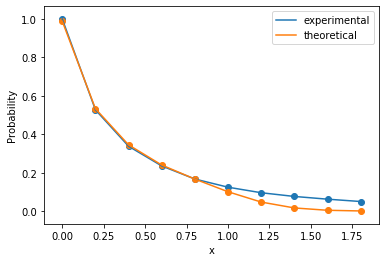

In [39]:
fig, ax = plt.subplots(1)
ax.plot(xs, experimental, label='experimental')
ax.scatter(xs, experimental)
ax.plot(xs, theoretical, label='theoretical')
ax.scatter(xs, theoretical)
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('Probability')
plt.show()